Step 1: Generate Synthetic Data


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

2025-07-02 14:26:36.624535: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 14:26:36.635698: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 14:26:36.714291: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 14:26:36.779811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751455596.841760  879124 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751455596.86

Step 2: Preprocess the Data

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

Step 3: Build and Train the Neural Network

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10


2025-07-02 14:26:39.505876: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3937 - loss: 0.6965 - val_accuracy: 0.5312 - val_loss: 0.6962
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4359 - loss: 0.6936 - val_accuracy: 0.4688 - val_loss: 0.6958
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4735 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4867 - loss: 0.6946 - val_accuracy: 0.4688 - val_loss: 0.6950
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4745 - loss: 0.6968 - val_accuracy: 0.4688 - val_loss: 0.6945
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5477 - loss: 0.6928 - val_accuracy: 0.4688 - val_loss: 0.6942
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5221 - loss: 0.6924 - val_accuracy: 0.5312 - val_loss: 0.6939
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5226 - loss: 0.6935 - val_accuracy: 0.5312 - val_loss: 0.6935
Ep

Step 4: Evaluate the Model

In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5813 - loss: 0.6892
Test Accuracy: 0.574999988079071


Step 5:Visualization

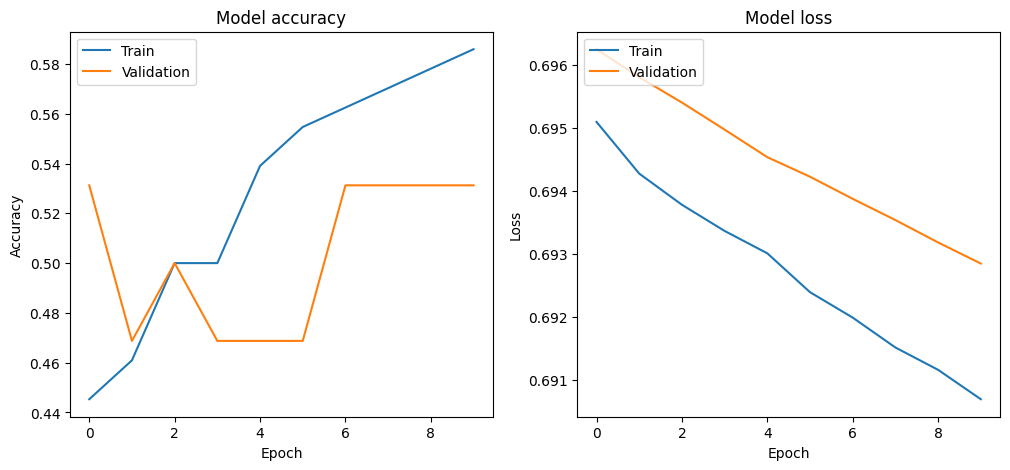

In [5]:
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Decision Boundary

The Decision Boundary is a boundary in the feature space that separates the data points into different classes based on the predictions made by the model. In our exercise, we have two input features: website visit duration and number of pages visited. The decision boundary will be a line or curve in this 2-dimensional space that separates the points predicted to make a purchase (class 1) from those predicted not to make a purchase (class 0).

How It's Determined 
  - The neural network learns the decision boundary during training. It adjusts its internal parameters (weights and biases) to correctly classify the training data. The boundary is where the model's output (before applying a threshold) is at some critical value, often 0.5 for binary classification with a sigmoid output. Points on one side of the boundary are classified as one class, and points on the other side as the other class.
  
Visualization 
  - In the plot, the decision boundary is typically represented by a line or contour. Points falling on one side of the boundary are predicted to be in one class, and those on the other side in the other class. The decision boundary can be linear or non-linear depending on the complexity of the model and the nature of the data.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


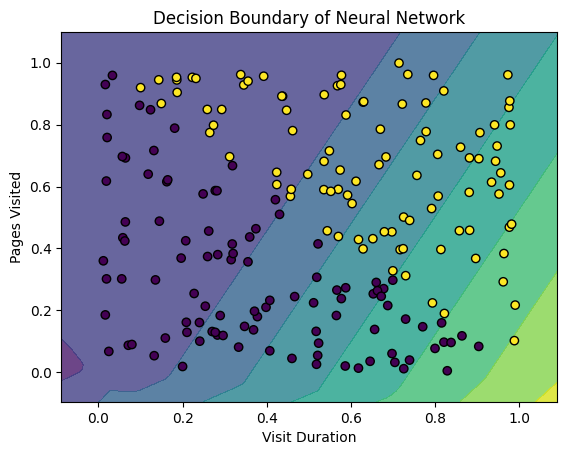

In [6]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()